In [15]:
#IMPORT LIBRARIES ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [3]:
file_path = r"D:\Shreya DA Projects\Autocomplete and Autocorrect Data Analytics [L2] P9\creditcard.csv"
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [16]:
# ---------- 3. DATASET OVERVIEW ----------
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [17]:
print("\nClass Distribution:")
print(df['Class'].value_counts())


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [18]:
# ---------- 5. FEATURE & TARGET SPLIT ----------
X = df.drop('Class', axis=1)
y = df['Class']

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# ---------- 7. TRAIN-TEST SPLIT (STRATIFIED) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [21]:
# ---------- 8. TRAIN LOGISTIC REGRESSION MODEL ----------
model = LogisticRegression(
    max_iter=3000,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=3000, random_state=42)

In [22]:
# ---------- 9. MAKE PREDICTIONS ----------
y_pred = model.predict(X_test)

In [23]:
# ---------- 10. MODEL EVALUATION ----------
print("\n📊 Model Performance")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


📊 Model Performance
Accuracy : 0.9754573224254767
Precision: 0.060810810810810814
Recall   : 0.9183673469387755
F1 Score : 0.11406844106463879

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



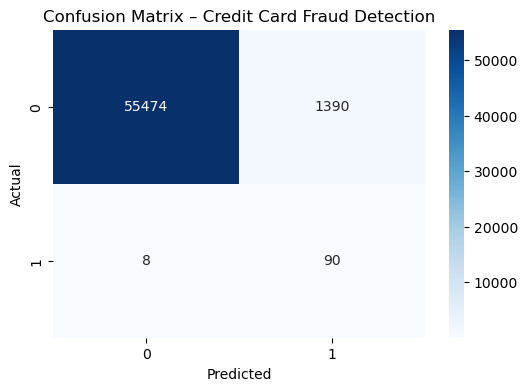

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Credit Card Fraud Detection")
plt.show()

In [25]:
# ---------- 12. BASIC TESTING ----------
print("\n🧪 Testing with one unseen transaction:")
sample_pred = model.predict(X_test[:1])
print("Predicted Class:", sample_pred[0])
print("Actual Class   :", y_test.iloc[0])


🧪 Testing with one unseen transaction:
Predicted Class: 0
Actual Class   : 0
